In [37]:
import numpy as np
from PIL import Image, ImageDraw
import random

# Set the image size
image_size = 32

# Set the number of frames
num_frames = 6

# Set the growth rates
growth_rates = [0.5, 1.5, 3.0]  # low, medium, high

# Create a dictionary to store the dataset
dataset = {'images': [], 'labels': []}

# Generate the dataset
for _ in range(10000):  # Generate 10,000 samples
    # Generate a random dot color
    dot_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    # Generate a random initial dot size
    initial_dot_size = random.randint(2, 10)

    # Generate a random initial dot position
    initial_dot_x = random.randint(0, image_size - initial_dot_size)
    initial_dot_y = random.randint(0, image_size - initial_dot_size)

    # Randomly select a growth rate
    growth_rate = random.choice(growth_rates)

    # Randomly select a growth direction (dx, dy)
    direction_x = random.choice([-1, 0, 1])  # Horizontal growth: left, none, or right
    direction_y = random.choice([-1, 0, 1])  # Vertical growth: up, none, or down

    # Ensure at least one direction is non-zero to have growth
    while direction_x == 0 and direction_y == 0:
        direction_x = random.choice([-1, 0, 1])
        direction_y = random.choice([-1, 0, 1])

    # Create a list to store the images for this sample
    sample_images = []

    # Generate the images for this sample
    for i in range(num_frames):
        # Create a new image
        img = Image.new('RGB', (image_size, image_size), color=(255, 255, 255))
        draw = ImageDraw.Draw(img)

        # Calculate the dot size based on the growth rate
        dot_size = initial_dot_size + int(growth_rate * i)

        # Ensure the dot size doesn't exceed the image size
        dot_size = min(dot_size, image_size)

        # Calculate the new position of the dot
        new_dot_x = initial_dot_x + direction_x * int(growth_rate * i)
        new_dot_y = initial_dot_y + direction_y * int(growth_rate * i)

        # Ensure the dot stays within bounds
        new_dot_x = max(0, min(new_dot_x, image_size - dot_size))
        new_dot_y = max(0, min(new_dot_y, image_size - dot_size))

        # Draw the dot
        draw.ellipse(
            [(new_dot_x, new_dot_y), (new_dot_x + dot_size, new_dot_y + dot_size)], 
            fill=dot_color
        )

        # Add the image to the list
        sample_images.append(np.array(img))

    # Add the entire sequence of images and the corresponding label
    dataset['images'].append(np.array(sample_images))  # Append the sequence as a single unit
    dataset['labels'].append(growth_rates.index(growth_rate))  # One label per sequence

# Convert the lists to NumPy arrays
dataset['images'] = np.array(dataset['images'])  # Shape: (10000, 6, 32, 32, 3)
dataset['labels'] = np.array(dataset['labels'])  # Shape: (10000,)

# Split the dataset
num_samples = len(dataset['labels'])
indices = np.arange(num_samples)
np.random.shuffle(indices)

# 80-10-10 split
train_end = int(0.8 * num_samples)
val_end = train_end + int(0.1 * num_samples)

train_indices = indices[:train_end]
val_indices = indices[train_end:val_end]
test_indices = indices[val_end:]

train_set = {
    'images': dataset['images'][train_indices],
    'labels': dataset['labels'][train_indices]
}

val_set = {
    'images': dataset['images'][val_indices],
    'labels': dataset['labels'][val_indices]
}

test_set = {
    'images': dataset['images'][test_indices],
    'labels': dataset['labels'][test_indices]
}

# Print dataset shapes
print("Train set:", train_set['images'].shape, train_set['labels'].shape)
print("Validation set:", val_set['images'].shape, val_set['labels'].shape)
print("Test set:", test_set['images'].shape, test_set['labels'].shape)

# Save the datasets to separate files
np.savez('../data/synthetic-growth/train.npz', images=train_set['images'], labels=train_set['labels'])
np.savez('../data/synthetic-growth/val.npz', images=val_set['images'], labels=val_set['labels'])
np.savez('../data/synthetic-growth/test.npz', images=test_set['images'], labels=test_set['labels'])

Train set: (8000, 6, 32, 32, 3) (8000,)
Validation set: (1000, 6, 32, 32, 3) (1000,)
Test set: (1000, 6, 32, 32, 3) (1000,)


Loaded images shape: (8000, 6, 32, 32, 3)
Sample label: 0


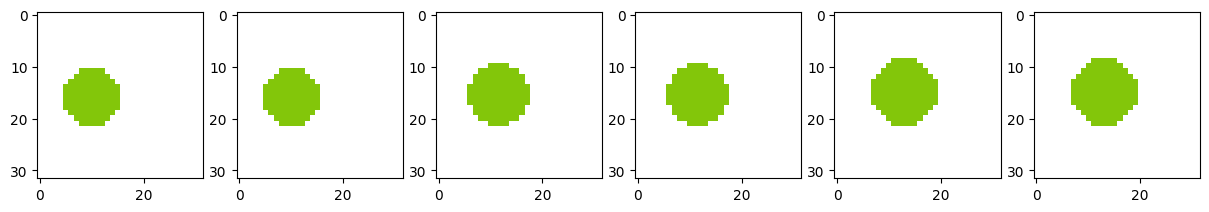

In [12]:
import numpy as np
import random

# Load the dataset from the file and show the first sample
loaded_dataset = np.load('../data/synthetic-growth/train.npz')
print("Loaded images shape:", loaded_dataset['images'].shape)

# Show a random sample
sample_idx = random.randint(0, loaded_dataset['images'].shape[0])
sample_images = loaded_dataset['images'][sample_idx]
sample_label = loaded_dataset['labels'][sample_idx]
print("Sample label:", sample_label)

# Plot the 6 RGB frames of the first sample
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    axs[i].imshow(sample_images[i])
    axs[i].axis('on')
plt.show()